In [127]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.io
import os

In [150]:
def load_pn_system( filename ):
    #print("loading PN solution from {}".format(filename))
    data = scipy.io.loadmat(filename)
    sigma_t = data["sigma_t"]
   
    result = {}
    if "x" in data:
        result["x"] = data["x"]
    if "b" in data:
        result["b"] = data["b"]
    if "A" in data:
        result["A"] = data["A"]
    return result

def get_global_index(voxel_i, voxel_j, coeff, res_x, res_y):
    numCoeffs = 3
    voxel = voxel_j*res_x + voxel_i
    return voxel*numCoeffs + coeff
    
def visualize_solution_vector( x, res_x, res_y ):

    u0 = np.zeros( (res_x, res_y) )
    for voxel_i in range(res_x):
        for voxel_j in range(res_y):
            i = get_global_index(voxel_i, voxel_j, 0, res_x, res_y)
            value = x[i, 0]
            u0[voxel_i, voxel_j] = value

    u0 = np.abs(u0)
    #u0 = -u0
    #u0 = np.clip(u0,1.0e-8, np.max(u0))

    vmin = np.min(u0)
    vmax = np.max(u0)
    
    if vmin >= vmax:
        vmin = vmax
    #print("vmin={} vmax={}".format(vmin, vmax))

    if vmin==vmax or vmin < 0.0:
        img_view = plt.imshow(u0.T, interpolation="nearest", cmap='jet', vmin=vmin, vmax=vmax, origin='lower')
    else:
        img_view = plt.imshow(u0.T, interpolation="nearest", cmap='jet', norm=LogNorm(vmin=vmin, vmax=vmax), origin='lower')
    return img_view

# First order RTE form --- staggered grid vs. collocated grid

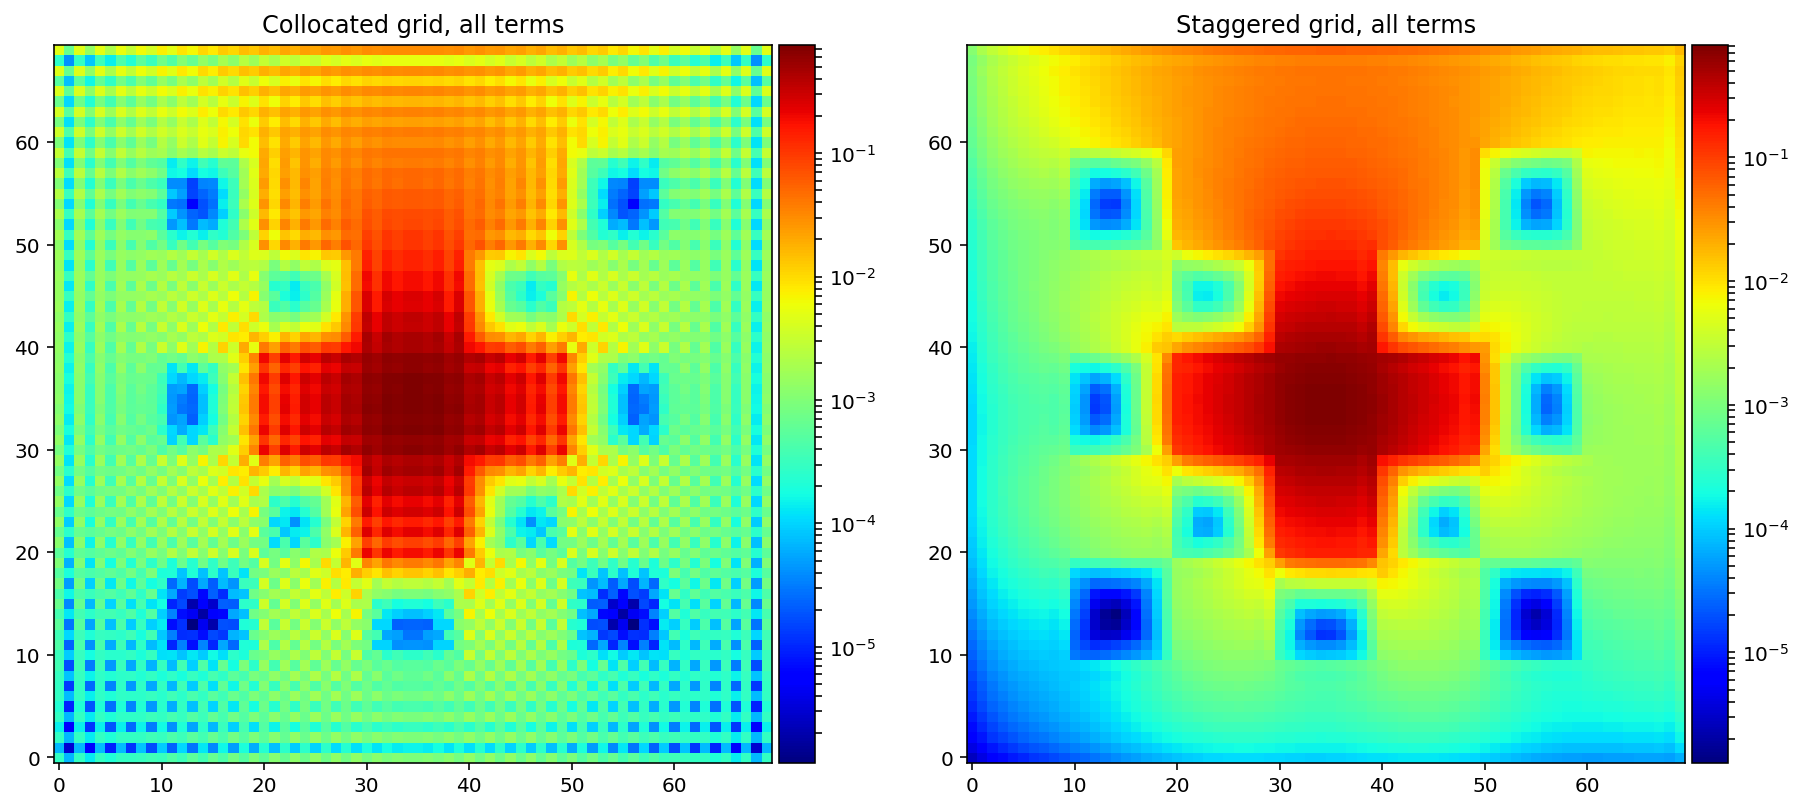

In [172]:
fig = plt.figure(figsize=(15, 15));

ax = plt.subplot(221)
plt.title("Collocated grid, all terms")
path = "C:/projects/epfl/epfl17/python/pnsolver/results/terms_new"
filename = "{}/{}_fopn_cg.mat".format(path, problem_id)
result = load_pn_system(filename)
img_view = visualize_solution_vector( result["x"], res_x, res_y )
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(img_view, cax=cax)

ax = plt.subplot(222)
plt.title("Staggered grid, all terms")
path = "C:/projects/epfl/epfl17/python/pnsolver/results/terms_new"
filename = "{}/{}_fopn_sg.mat".format(path, problem_id)
result = load_pn_system(filename)
img_view = visualize_solution_vector( result["x"], res_x, res_y )
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(img_view, cax=cax)

plt.show()

# Second order RTE form --- staggered grid vs. collocated grid

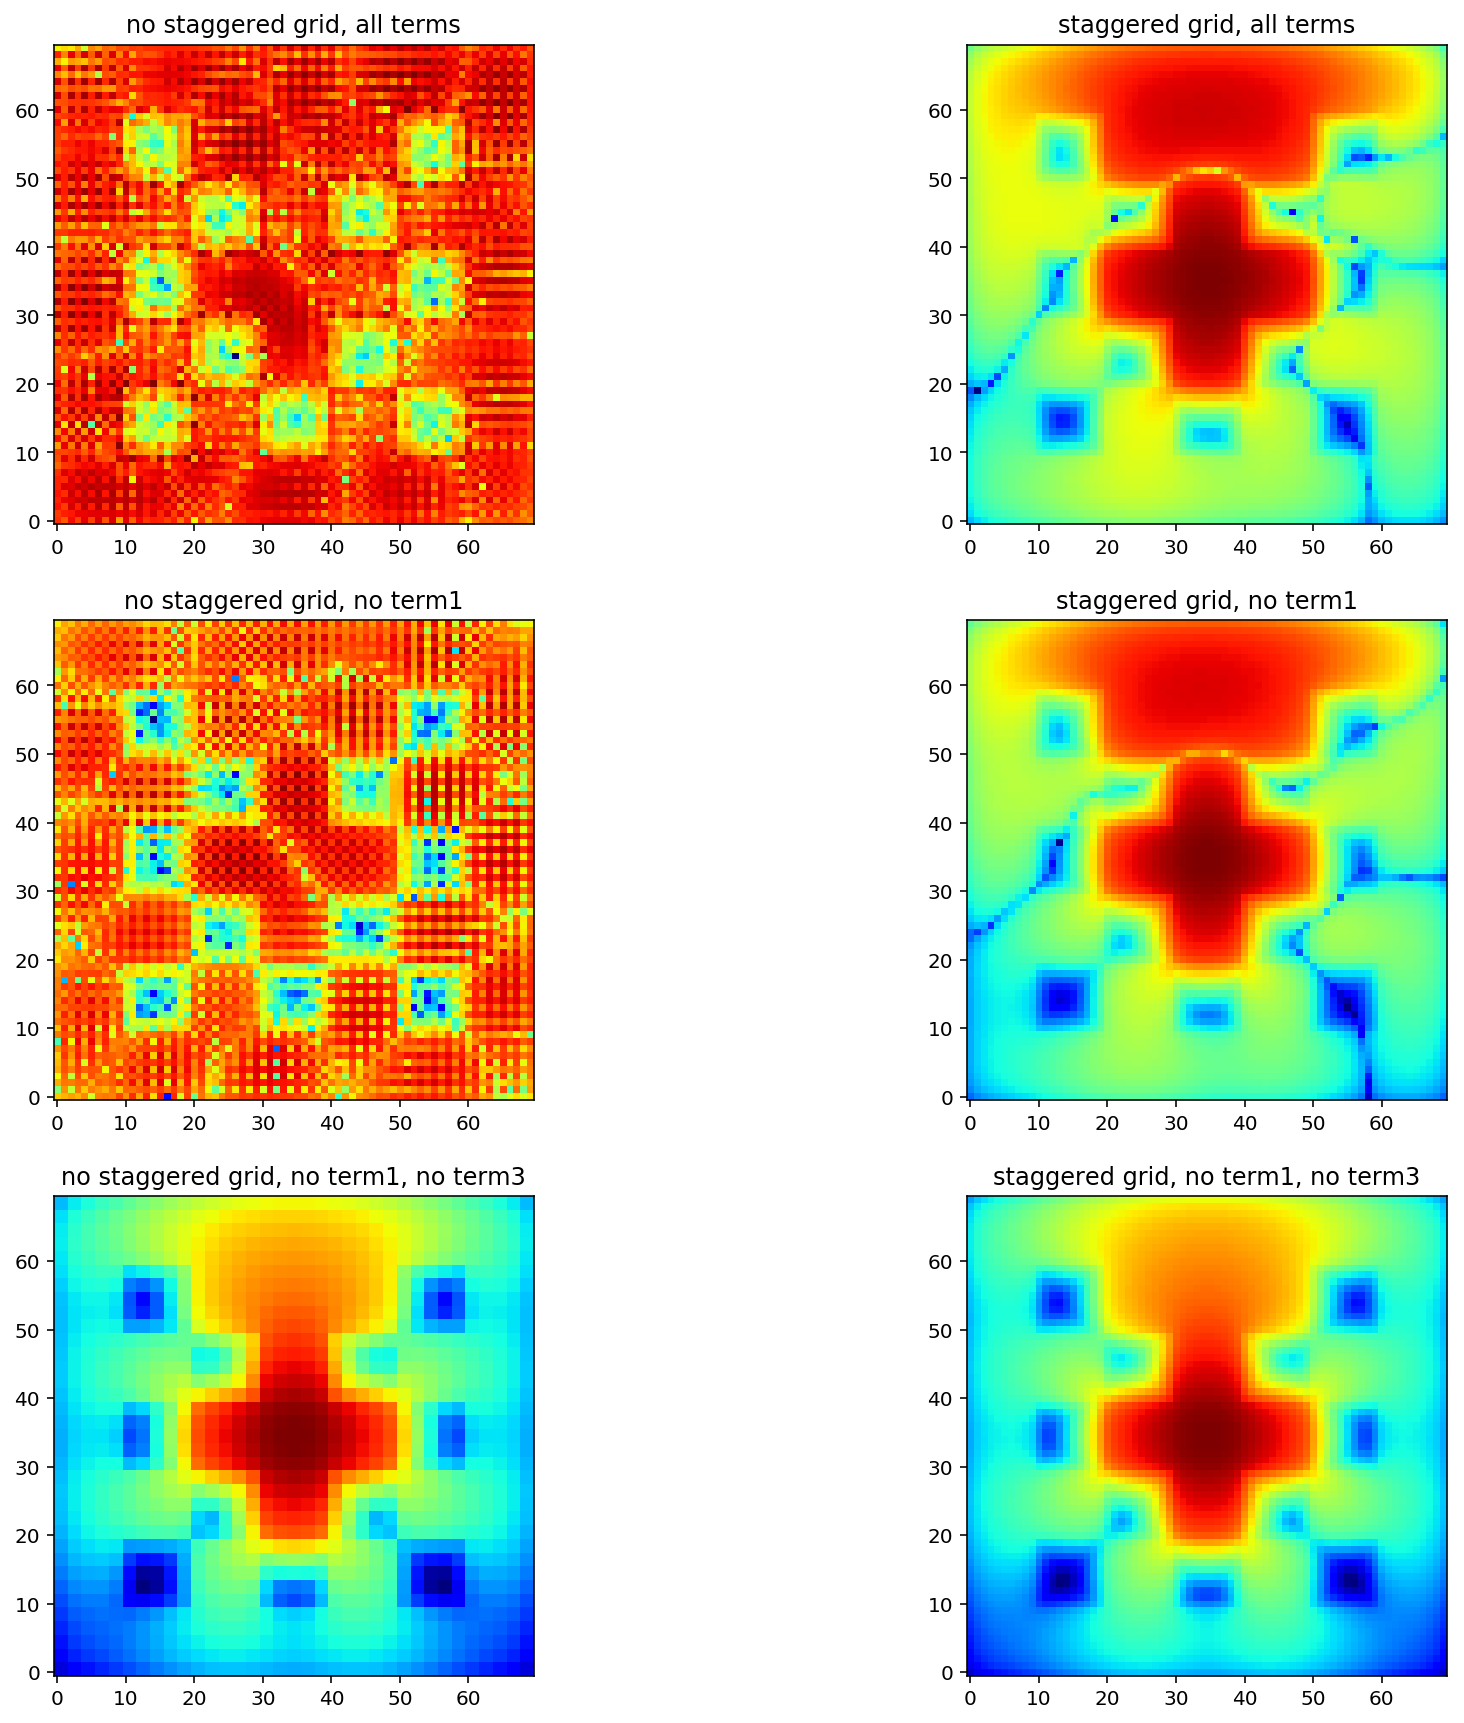

In [15]:
path = "C:/projects/epfl/epfl17/python/pnsolver/results"
problem_id = "checkerboard"
filename = "{}/{}.mat".format(path, problem_id)
res_x = 70
res_y = 70


fig = plt.figure(figsize=(15, 15));

plt.subplot(321)
plt.title("no staggered grid, all terms")
filename = "{}/{}_{}.mat".format(path, "nosg_allterms", problem_id)
result = load_pn_system(filename)
visualize_solution_vector( result["x"], res_x, res_y )

plt.subplot(322)
plt.title("staggered grid, all terms")
filename = "{}/{}_{}.mat".format(path, "sg_allterms", problem_id)
result = load_pn_system(filename)
visualize_solution_vector( result["x"], res_x, res_y )

plt.subplot(323)
plt.title("no staggered grid, no term1")
filename = "{}/{}_{}.mat".format(path, "nosg_not1", problem_id)
result = load_pn_system(filename)
visualize_solution_vector( result["x"], res_x, res_y )

plt.subplot(324)
plt.title("staggered grid, no term1")
filename = "{}/{}_{}.mat".format(path, "sg_not1", problem_id)
result = load_pn_system(filename)
visualize_solution_vector( result["x"], res_x, res_y )

plt.subplot(325)
plt.title("no staggered grid, no term1, no term3")
filename = "{}/{}_{}.mat".format(path, "nosg_not13", problem_id)
result = load_pn_system(filename)
visualize_solution_vector( result["x"], res_x, res_y )

plt.subplot(326)
plt.title("staggered grid, no term1, no term3")
filename = "{}/{}_{}.mat".format(path, "sg_not13", problem_id)
result = load_pn_system(filename)
visualize_solution_vector( result["x"], res_x, res_y )

plt.show()

# Dirichlet vs. Neumann BC

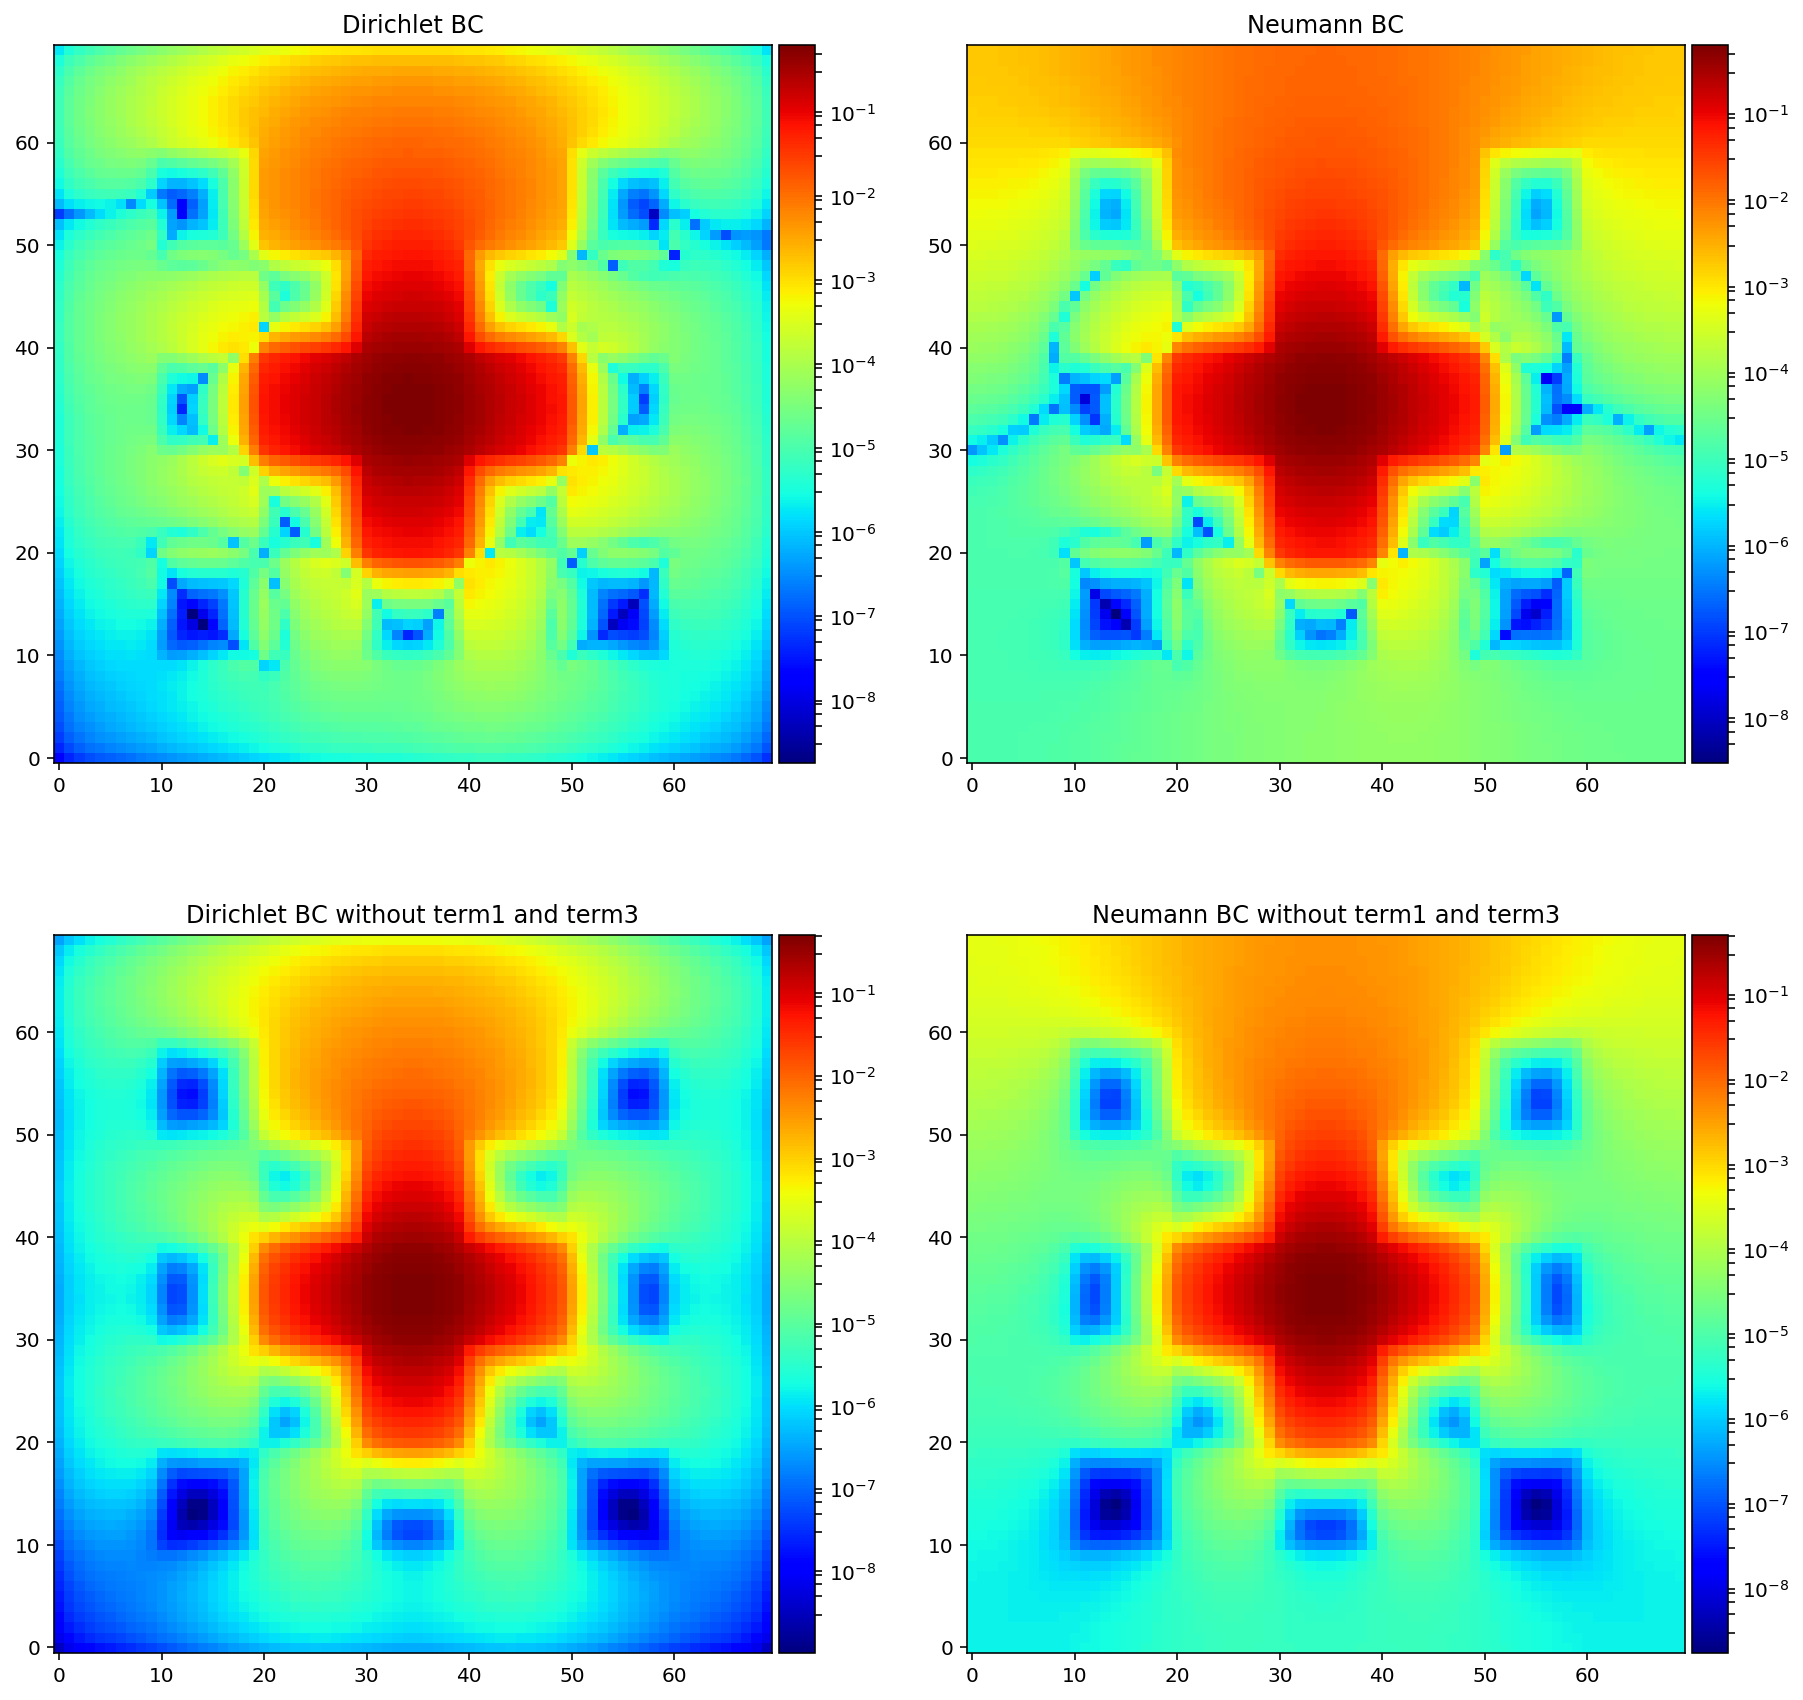

In [141]:
fig = plt.figure(figsize=(15, 15));

ax = plt.subplot(221)
plt.title("Dirichlet BC")
path = "C:/projects/epfl/epfl17/python/pnsolver/results/terms_new"
filename = "{}/{}_dirichlet.mat".format(path, problem_id)
result = load_pn_system(filename)
img_view = visualize_solution_vector( result["x"], res_x, res_y )
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(img_view, cax=cax)

ax = plt.subplot(222)
plt.title("Neumann BC")
path = "C:/projects/epfl/epfl17/python/pnsolver/results/terms_new"
filename = "{}/{}_neumann.mat".format(path, problem_id)
result = load_pn_system(filename)
img_view = visualize_solution_vector( result["x"], res_x, res_y )
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(img_view, cax=cax)

ax = plt.subplot(223)
plt.title("Dirichlet BC without term1 and term3")
path = "C:/projects/epfl/epfl17/python/pnsolver/results/terms_new"
filename = "{}/{}_dirichlet_not13.mat".format(path, problem_id)
result = load_pn_system(filename)
img_view = visualize_solution_vector( result["x"], res_x, res_y )
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(img_view, cax=cax)

ax = plt.subplot(224)
plt.title("Neumann BC without term1 and term3")
path = "C:/projects/epfl/epfl17/python/pnsolver/results/terms_new"
filename = "{}/{}_neumann_not13.mat".format(path, problem_id)
result = load_pn_system(filename)
img_view = visualize_solution_vector( result["x"], res_x, res_y )
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(img_view, cax=cax)


plt.show()

In [74]:
'''
def print_matrix( A ):
	for i in range(A.shape[0]):
		for j in range(A.shape[1]):
			v = A[i,j]
			if np.abs(np.real(v)) > 1.0e-8 or np.abs(np.imag(v)) > 1.0e-8:
				print("  ({}, {}) {}".format(i, j, v))
'''


def compare( A0, A1, id0, id1 ):
    if A0.shape != A1.shape:
        raise ValueError("unmatched shape")

    if A0.dtype != A1.dtype:
        raise ValueError("unmatched dtype")

    diff = A0-A1
    abs_real_diff = np.abs(np.real(diff))
    abs_imag_diff = np.abs(np.imag(diff))

    max_index = np.unravel_index(np.argmax(abs_real_diff), abs_real_diff.shape)
    mm = abs_real_diff[max_index]
    print("real: max={} max element=({}, {})".format(mm,max_index[0], max_index[1]))
    max_index = np.unravel_index(np.argmax(abs_imag_diff), abs_imag_diff.shape)
    mm = abs_imag_diff[max_index]
    print("imag: max={} max element=({}, {})".format(mm,max_index[0], max_index[1]))

    '''
	print("{} result:".format(id0))
	for i in range(A0.shape[0]):
		for j in range(A0.shape[1]):
			v = A0[i,j]
			if np.abs(np.real(v)) > 1.0e-8 or np.abs(np.imag(v)) > 1.0e-8:
				print("  ({}, {}) {}".format(i, j, v))


	print("{} result:".format(id1))
	for i in range(A1.shape[0]):
		for j in range(A1.shape[1]):
			v = A1[i,j]
			if np.abs(np.real(v)) > 1.0e-8 or np.abs(np.imag(v)) > 1.0e-8:
				print("  ({}, {}) {}".format(i, j, v))
    '''



In [162]:
#for i in range(7):
#for i in range(5, 6):
for i in range(1):
    print( "term {} ---------------".format(i) )
    path_original = "c:/projects/epfl/epfl17/python/pnsolver/results/terms_original"
    path_new = "c:/projects/epfl/epfl17/python/pnsolver/results/terms_new"
    postfix = "_fopn"
    #postfix = "_fopn_term{}".format(i)
    filename_new = "{}/{}{}.mat".format(path_new, problem_id, postfix)
    filename_original = "{}/{}{}.mat".format(path_original, problem_id, postfix)
    data_new = scipy.io.loadmat(filename_new)
    data_original = scipy.io.loadmat(filename_original)
    compare(data_new["A"], data_original["A"], "new", "original")
    compare(data_new["b"], data_original["b"], "new", "original")
    #index = 6392
    #b_new = data_new["b"][index, 0]
    #b_org = data_original["b"][index, 0]
    #g = b_new - b_org
    #print("b_new={}  b_org={}   dif={}".format(b_new, b_org, np.abs(g)))

    
    
    

term 0 ---------------
real: max=1.2105871860512707e-12 max element=(0, 4)
imag: max=0.0 max element=(0, 0)
real: max=0.0 max element=(0, 0)
imag: max=0.0 max element=(0, 0)


# Tests

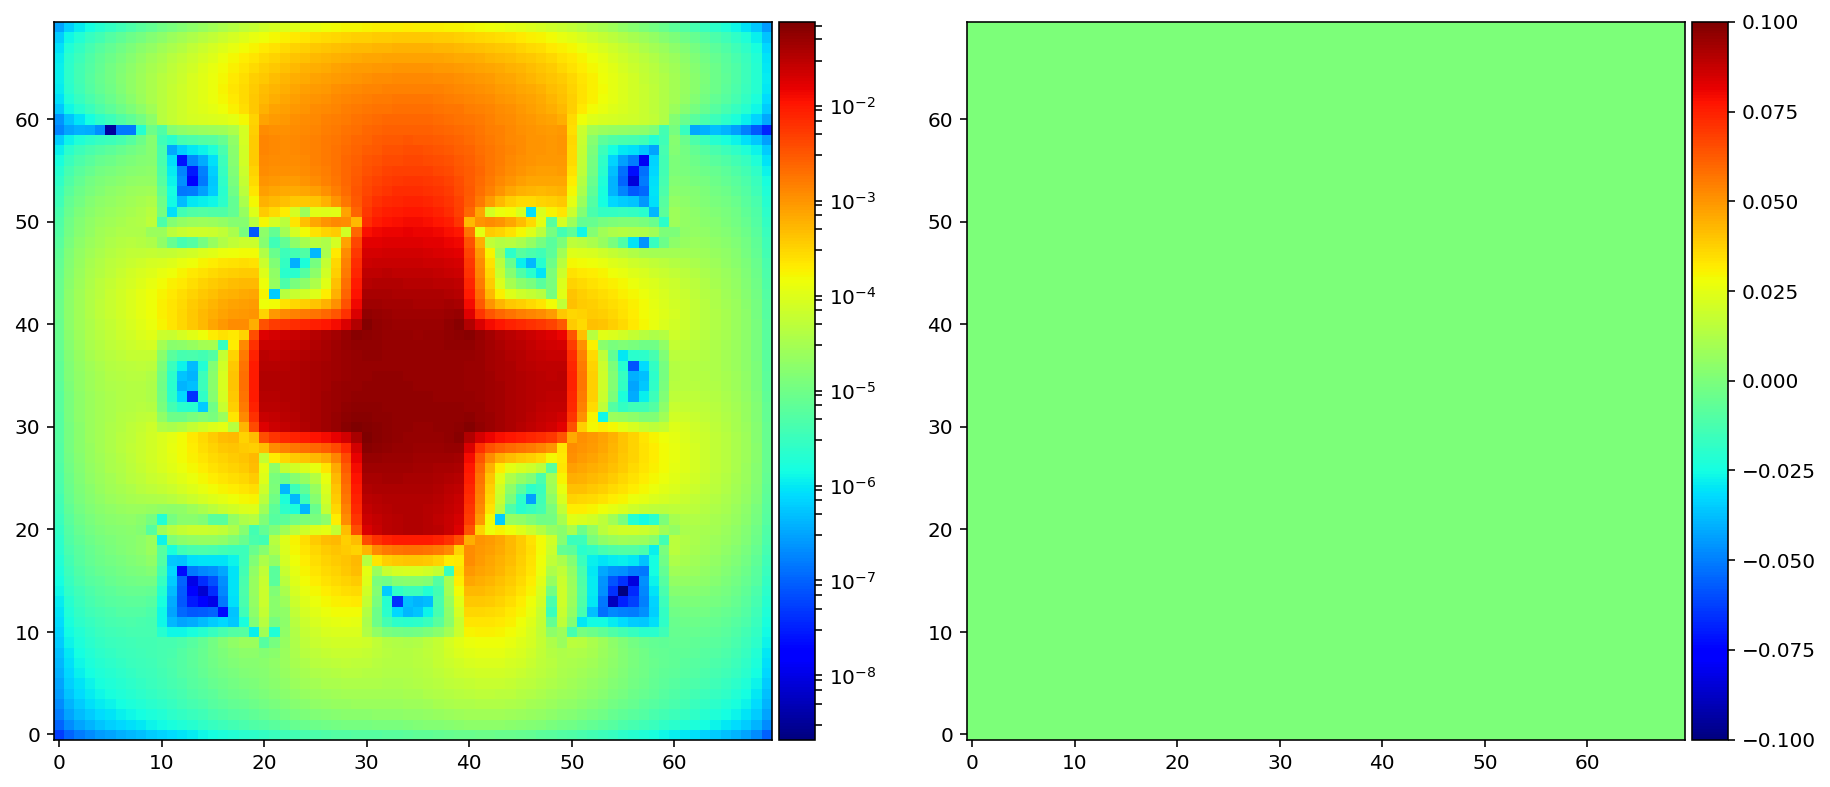

In [179]:
fig = plt.figure(figsize=(15, 15));

ax = plt.subplot(221)
#plt.title("Collocated grid, all terms")
path = "C:/projects/epfl/epfl17/python/pnsolver/results/terms_new"
filename = "{}/{}_temp.mat".format(path, problem_id)
result = load_pn_system(filename)
img_view = visualize_solution_vector( result["x"], res_x, res_y )
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(img_view, cax=cax)


ax = plt.subplot(222)
#plt.title("Collocated grid, all terms")
path = "C:/projects/epfl/epfl17/python/pnsolver/results/terms_new"
filename = "{}/{}_temp2.mat".format(path, problem_id)
result = load_pn_system(filename)
img_view = visualize_solution_vector( result["x"], res_x, res_y )
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(img_view, cax=cax)

plt.show()